<h3><center>Clase ejercicios - IMA539.</center></h3>
<center>Camilo Calfucoy, Jorge Ruíz</center>
<center>Departamento de Ingeniería Matemática</center>
<center>Octubre 14, 2024.</center>


## Ejercicios


1. Leer el archivo `data_3.arff` como un dataframe de Pandas, este archivo tiene la ultima columna (`Class`) en tipo bytes, cambiar a categoricas (Hints: Importar desde `scipy.io` el objeto `arff` y utilizarlo para leer los datos. Decodificar los objetos tipo bytes con la función `.decode('utf-8')`)
2. Genere el conjunto ($X$,$y$) en la que $y$ es la última columna del dataframe que define las clases, y $X$ esté conformado por el resto de columnas
3. Separe los datos de trabajo en 70% para entrenamiento y 30% para testeo resguardando las proporciones entre las clases.
4. Escale los datos de entrenamiento y testeo utilizando `StandardScalar`.
5. Utilizando LDA genere una versión reducida $X_5$ de los datos de entrenamiento que tenga solo 5 columnas.
6. Instancie un modelo clasificador KNN y entrene el modelo instanciado con los datos de entrenamiento $X_5$
7. Utilice el modelo entrenado para predecir por separado sobre los datos de entrenamiento y los de testeo.
8. Muestre las matrices de confusion tanto para el conjunto de entrenamiento como para el conjunto de testeo.
9. Calcular varias metricas de rendimiento del modelo respecto a los conjuntos conjunto de entrenamiento y testeo.
10. Realice una busqueda aleatoria de hiperparametros para una pipeline que utilice un escalamento MinMax, una reducción de dimensión con PCA (igualmente a dimensión 5) y con un modelo SVC de sklearn. La búsqueda de hiperparámetros debe realizarse sobre el conjunto de entrenamiento.
11. Calcular la  matriz de confusión y las métricas de Exactitud, MCC y Coeficiente Kappa de la prediccion del conjunto de testeo del modelo con los mejores hiperparametros encontrados.

## Soluciones

1. Leer el archivo `data_3.arff` como un dataframe de Pandas, este archivo tiene la última columna (`Class`) en tipo bytes, cambiar a categoricas (Hints: Importar desde `scipy.io` el objeto `arff` y utilizarlo para leer los datos. Decodificar los objetos tipo bytes con la función `.decode('utf-8')`)

In [96]:
import pandas as pd
from scipy.io import arff

data= arff.loadarff('data_3.arff')
df = pd.DataFrame(data[0])
df['Class'] = df['Class'].apply(lambda x: x.decode('utf-8')).astype('category')


2. Genere el conjunto ($X$,$y$) en la que $y$ es la ultima columna del dataframe que define las clases, y $X$ esté conformado por el resto de columnas

In [97]:
df.info()
X=df.iloc[:,:-1].copy()
y = df['Class'].copy()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13910 entries, 0 to 13909
Columns: 129 entries, V1 to Class
dtypes: category(1), float64(128)
memory usage: 13.6 MB
<class 'pandas.core.series.Series'>
RangeIndex: 13910 entries, 0 to 13909
Series name: Class
Non-Null Count  Dtype   
--------------  -----   
13910 non-null  category
dtypes: category(1)
memory usage: 13.9 KB


3. Separe los datos de trabajo en 70% para entrenamiento y 30% para testeo resguardando las proporciones entre las clases.

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30,stratify=y,random_state=1)


4. Escale los datos de entrenamiento y testeo utilizando `StandardScalar`.

In [99]:
from sklearn.preprocessing import StandardScaler
stdsc=StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

5. Utilizando LDA genere una versión reducida $X_5$ de los datos de entrenamiento que tenga solo 5 columnas.

In [100]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Inicializamos LDA con 5 componentes
lda = LDA(n_components=5)

# Ajustamos y transformamos los datos para reducir a 5 dimensiones
X_5 = lda.fit_transform(X_train_std, y_train)

# Verificamos la nueva forma de X_5
print("Dimensiones de X_5:", X_5.shape)

Dimensiones de X_5: (9737, 5)


6. Instancie un modelo clasificador KNN y entrene el modelo instanciado con los datos de entrenamiento $X_5$

In [101]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciar el modelo KNN con un número de vecinos (k) que se desee, por ejemplo k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo con los datos de entrenamiento reducidos X_5 y las etiquetas y
knn.fit(X_5, y_train)


KNeighborsClassifier()

7. Utilice el modelo entrenado para predecir por separado sobre los datos de entrenamiento y los de testeo.

In [102]:
# Predicciones sobre los datos de entrenamiento

y_pred_train = knn.predict(X_5)

# Si tienes el conjunto de testeo ya definido como X_test y lo has reducido a 5 dimensiones usando LDA
# Aplicamos la transformación LDA al conjunto de testeo
X_test_5 = lda.transform(X_test_std)

# Predicciones sobre los datos de testeo
y_pred_test = knn.predict(X_test_5)

# Verificamos las predicciones
print("Predicciones sobre los datos de entrenamiento:", y_pred_train)
print("Predicciones sobre los datos de testeo:", y_pred_test)
train_score = knn.score(X_5, y_train)

# Si tienes los datos de testeo con etiquetas verdaderas
test_score = knn.score(X_test_5, y_test)

# Mostrar los resultados
print(f"Precisión en los datos de entrenamiento: {train_score}")
print(f"Precisión en los datos de testeo: {test_score}")

Predicciones sobre los datos de entrenamiento: ['5' '2' '4' ... '4' '3' '2']
Predicciones sobre los datos de testeo: ['1' '6' '5' ... '5' '1' '1']
Precisión en los datos de entrenamiento: 0.9899352983465133
Precisión en los datos de testeo: 0.9849029475197699


8. Muestre las matrices de confusion tanto para el conjunto de entrenamiento como para el conjunto de testeo.

Matriz de confusión - Entrenamiento:
[[1790    1    0    4    0    1]
 [   2 2036    4    1    4    1]
 [   0    5 1132    0   11    1]
 [   1    0    0 1333    3   18]
 [   6    1    7    4 2086    2]
 [   0    1    0   19    1 1262]]
Matriz de confusión - Testeo:
[[760   2   0   6   1   0]
 [  2 869   6   0   0   1]
 [  0   2 482   0   8   0]
 [  0   1   0 570   2   8]
 [  0   1   2   5 891   4]
 [  1   0   0  10   1 538]]


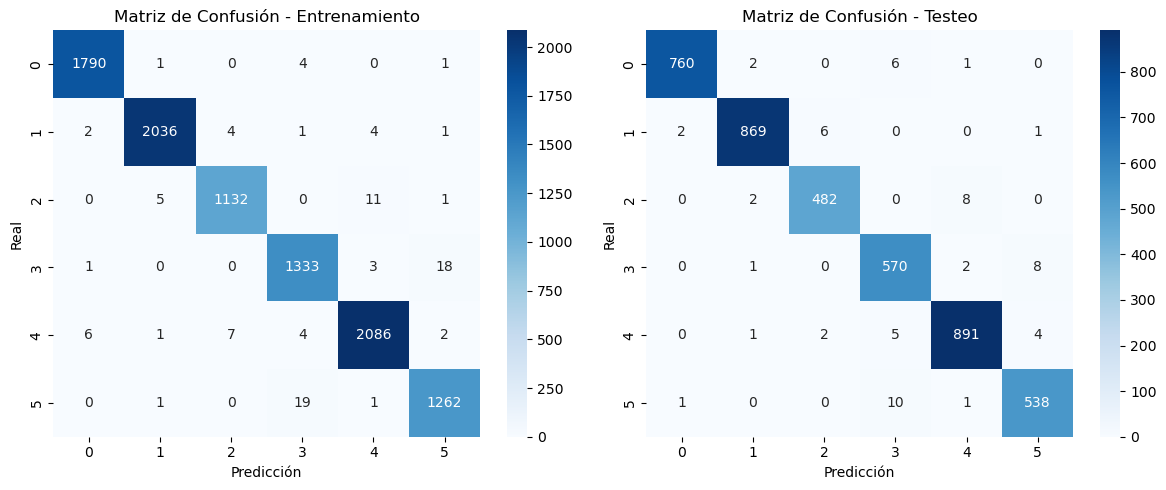

In [103]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predicciones sobre los datos de entrenamiento
y_pred_train = knn.predict(X_5)

# Predicciones sobre los datos de testeo
y_pred_test = knn.predict(X_test_5)

# Matriz de confusión para el conjunto de entrenamiento
conf_matrix_train = confusion_matrix(y_train, y_pred_train)

# Matriz de confusión para el conjunto de testeo
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Mostrar las matrices de confusión
print("Matriz de confusión - Entrenamiento:")
print(conf_matrix_train)

print("Matriz de confusión - Testeo:")
print(conf_matrix_test)

# Visualizar las matrices de confusión usando un mapa de calor
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Matriz de Confusión - Entrenamiento')
ax[0].set_xlabel('Predicción')
ax[0].set_ylabel('Real')

sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Matriz de Confusión - Testeo')
ax[1].set_xlabel('Predicción')
ax[1].set_ylabel('Real')

plt.tight_layout()
plt.show()


9. Calcular varias metricas de rendimiento del modelo respecto a los conjuntos conjunto de entrenamiento y testeo.

In [105]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Predicciones sobre los datos de entrenamiento
y_pred_train = knn.predict(X_5)

# Predicciones sobre los datos de testeo
y_pred_test = knn.predict(X_test_5)

# 1. Calcular métricas para el conjunto de entrenamiento
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, average='weighted')
recall_train = recall_score(y_train, y_pred_train, average='weighted')
f1_train = f1_score(y_train, y_pred_train, average='weighted')

# Mostrar métricas para entrenamiento
print("Métricas de rendimiento - Conjunto de entrenamiento:")
print(f"Precisión (Accuracy): {accuracy_train:.4f}")
print(f"Precisión (Precision): {precision_train:.4f}")
print(f"Exhaustividad (Recall): {recall_train:.4f}")
print(f"F1-Score: {f1_train:.4f}")
print("\nReporte de clasificación - Entrenamiento:")
print(classification_report(y_train, y_pred_train))

# 2. Calcular métricas para el conjunto de testeo
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

# Mostrar métricas para testeo
print("\nMétricas de rendimiento - Conjunto de testeo:")
print(f"Precisión (Accuracy): {accuracy_test:.4f}")
print(f"Precisión (Precision): {precision_test:.4f}")
print(f"Exhaustividad (Recall): {recall_test:.4f}")
print(f"F1-Score: {f1_test:.4f}")
print("\nReporte de clasificación - Testeo:")
print(classification_report(y_test, y_pred_test))


Métricas de rendimiento - Conjunto de entrenamiento:
Precisión (Accuracy): 0.9899
Precisión (Precision): 0.9899
Exhaustividad (Recall): 0.9899
F1-Score: 0.9899

Reporte de clasificación - Entrenamiento:
              precision    recall  f1-score   support

           1       0.99      1.00      1.00      1796
           2       1.00      0.99      1.00      2048
           3       0.99      0.99      0.99      1149
           4       0.98      0.98      0.98      1355
           5       0.99      0.99      0.99      2106
           6       0.98      0.98      0.98      1283

    accuracy                           0.99      9737
   macro avg       0.99      0.99      0.99      9737
weighted avg       0.99      0.99      0.99      9737


Métricas de rendimiento - Conjunto de testeo:
Precisión (Accuracy): 0.9849
Precisión (Precision): 0.9850
Exhaustividad (Recall): 0.9849
F1-Score: 0.9849

Reporte de clasificación - Testeo:
              precision    recall  f1-score   support

         

10. Realice una busqueda aleatoria de hiperparametros para una pipeline que utilice un escalamento MinMax, una reducción de dimensión con PCA (igualmente a dimensión 5) y con un modelo SVC de sklearn. La búsqueda de hiperparámetros debe realizarse sobre el conjunto de entrenamiento.


In [106]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Crear la pipeline
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),    
    ('pca', PCA(n_components=5)),  
    ('svc', SVC())                  
])

# Definir el espacio de búsqueda de hiperparámetros
param_distributions = {
    'svc__C': np.logspace(-3, 3, 7),               
    'svc__gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7)),  
    'svc__kernel': ['linear', 'rbf'],                 
}

# Instanciar RandomizedSearchCV
random_search = RandomizedSearchCV(
    pipeline, 
    param_distributions,
    n_iter=10,                               # Reducir el número de iteraciones para acelerar la búsqueda
    scoring='accuracy',                      
    cv=3,                                    # Menos pliegues para acelerar la validación cruzada
    random_state=42,                         
    n_jobs=-1                                 
)

# Ajustar RandomizedSearchCV al conjunto de entrenamiento
random_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)
print(f"Mejor score (accuracy): {random_search.best_score_:.4f}")

Mejores hiperparámetros encontrados:
{'svc__kernel': 'rbf', 'svc__gamma': 10.0, 'svc__C': 1.0}
Mejor score (accuracy): 0.9427


11. Calcular la matriz de confusion y las metricas de Exactitud, MCC y Coeficiente Kappa de la prediccion del conjunto de testeo del modelo con los mejores hiperparametros encontrados.

In [113]:
from sklearn.metrics import confusion_matrix, accuracy_score, cohen_kappa_score, matthews_corrcoef

# 1. Predicciones en el conjunto de testeo
y_test_pred_best = random_search.predict(X_test)

# 2. Matriz de confusión
cm_test_best = confusion_matrix(y_test, y_test_pred_best)

# 3. Métricas de rendimiento
accuracy_test_best = accuracy_score(y_test, y_test_pred_best)
mcc_test_best = matthews_corrcoef(y_test, y_test_pred_best)
kappa_test_best = cohen_kappa_score(y_test, y_test_pred_best)

# 4. Mostrar resultados
print("Matriz de confusión - Testeo con mejores hiperparámetros:")
print(cm_test_best)

print("\nMétricas de rendimiento - Testeo con mejores hiperparámetros")
print(f"Exactitud: {accuracy_test_best:.4f}")
print(f"MCC: {mcc_test_best:.4f}")
print(f"Coeficiente Kappa: {kappa_test_best:.4f}")

Matriz de confusión - Testeo con mejores hiperparámetros:
[[688   4   1  34  19  23]
 [  1 871   1   0   5   0]
 [  3   1 480   0   8   0]
 [ 14   0   0 488   7  72]
 [  1   1   0  20 871  10]
 [  3   0   0   9   5 533]]

Métricas de rendimiento - Testeo con mejores hiperparámetros
Exactitud: 0.9420
MCC: 0.9301
Coeficiente Kappa: 0.9297
